# Part 1: Delay prediction (binary classification)

Approach: logistic regression

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('merged_df_with_alerts.csv')
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99235,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0
99236,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0
99237,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0
99238,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,no alert,6.4,0.0,22.100000,16.1,28.1,0


In [237]:
df["delay_binary"] = df["Min Delay"].apply(lambda x: 1 if x > 0 else 0)
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99235,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99236,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99237,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99238,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,no alert,6.4,0.0,22.100000,16.1,28.1,0,0


In [239]:
# count when there is both alert and delay
df[(df["alerts"] == 1) & (df["delay_binary"] == 1)].shape

(2768, 15)

In [5]:
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99235,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99236,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99237,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99238,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,no alert,6.4,0.0,22.100000,16.1,28.1,0,0


In [145]:
df.describe()

,Min Delay,Min Gap,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary
count,99240.000000,99240.000000,99240.000000,99240.000000,99240.000000,99240.000000,99240.000000,99240.000000,99240.000000
mean,2.505663,3.688986,2.522730,0.362885,9.363947,3.916172,14.436569,0.078829,0.341364
std,8.895040,9.580790,6.578801,1.784578,10.468590,9.920125,11.281543,0.269473,0.474170
min,0.000000,0.000000,0.000000,0.000000,-20.466667,-25.500000,-15.400000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.100000,-3.200000,4.900000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,9.050000,4.000000,14.500000,0.000000,0.000000
75%,3.000000,7.000000,2.000000,0.000000,18.850000,12.500000,25.000000,0.000000,1.000000
max,716.000000,719.000000,110.050000,27.400000,28.766667,22.900000,36.400000,1.000000,1.000000


## Final Data

In [241]:
df_final = df.copy()
df_final["Date"] = pd.to_datetime(df_final["Date"])
df_final["Month"] = df_final["Date"].dt.month
df_final["Time"] = pd.to_datetime(df_final["Time"])
df_final["Time"] = df_final["Time"].dt.hour
df_final["Date"] = pd.to_datetime(df_final["Date"])
df_final["Date"] = df_final["Date"].dt.dayofyear
weekday_dict = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
df_final["Day"] = df_final["Day"].map(weekday_dict)
df_final

/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_9442/531750226.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_final["Time"] = pd.to_datetime(df_final["Time"])


,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary,Month
0,1,0,7,KENNEDY BD STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
1,1,1,7,ISLINGTON STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
2,1,3,7,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
3,1,4,7,GREENWOOD YARD,SUUT,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
4,1,4,7,YONGE SHP STATION,PUCSS,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99235,244,1,6,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99236,244,1,6,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99237,244,1,6,WARDEN STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99238,244,16,6,DON MILLS STATION,SUO,0,0,no alert,6.4,0.0,22.100000,16.1,28.1,0,0,8


In [243]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Data preparation
X = df_final[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Station", "Time", "Day"]]
X = pd.get_dummies(X, columns=["Station"], drop_first=True)

# Define the target variable
y = df_final["delay_binary"]

# Standardize the numerical columns
numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Polynomial features for temperature and precipitation
poly = PolynomialFeatures(degree=2, include_bias=False)
temp_rain_features = poly.fit_transform(X[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]])
temp_rain_df = pd.DataFrame(temp_rain_features, columns=poly.get_feature_names_out(["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]))

X = pd.concat([X, temp_rain_df], axis=1)
X["Time_cos"] = X["Time"].apply(lambda x: np.cos(2 * np.pi * x / 24))
X["Day_cos"] = X["Day"].apply(lambda x: np.cos(2 * np.pi * x / 7))

# Drop original Time and Day columns to avoid duplicacy
X.drop(['Time', 'Day'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,MIN_TEMPERATURE,MAX_TEMPERATURE,TOTAL_RAIN,TOTAL_SNOW,Station_1 TIPPETT ROAD,Station_111 SPADINA ROAD,Station_120 CARTWRIGHT AVE,Station_169 DANFORTH AVENUE,Station_1900 YONGE MCBRIEN BLD,Station_1900 YONGE ST- MCBRIEN,...,MIN_TEMPERATURE TOTAL_RAIN,MIN_TEMPERATURE TOTAL_SNOW,MAX_TEMPERATURE^2,MAX_TEMPERATURE TOTAL_RAIN,MAX_TEMPERATURE TOTAL_SNOW,TOTAL_RAIN^2,TOTAL_RAIN TOTAL_SNOW,TOTAL_SNOW^2,Time_cos,Day_cos
74555,0.915702,0.936351,-0.018656,-0.203346,False,False,False,False,False,False,...,-0.017083,-0.186204,0.876753,-0.017468,-0.190403,0.000348,0.003794,0.041350,-0.500000,0.623490
51189,0.915702,1.113633,-0.383465,-0.203346,False,False,False,False,False,False,...,-0.351140,-0.186204,1.240178,-0.427040,-0.226453,0.147046,0.077976,0.041350,-0.500000,-0.900969
57934,-0.445175,-1.040339,1.790194,0.805301,False,False,False,False,False,False,...,-0.796950,-0.358500,1.082305,-1.862408,-0.837786,3.204795,1.441644,0.648509,1.000000,0.623490
47506,0.663687,0.537467,3.355837,-0.203346,False,False,False,False,False,False,...,2.227226,-0.134958,0.288871,1.803653,-0.109292,11.261641,-0.682397,0.041350,0.965926,0.623490
30042,0.966104,0.980671,-0.383465,-0.203346,False,False,False,False,False,False,...,-0.370468,-0.196454,0.961716,-0.376054,-0.199416,0.147046,0.077976,0.041350,-0.707107,-0.900969


## Use Logistic Regression to predict whether there is going to be a delay

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]]
y = df["delay_binary"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Accuracy: 0.6597642079806529
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
y_pred.sum()

0

In [21]:
# To see if there is an imbalance in target data
df["delay_binary"].value_counts()/df.shape[0]

delay_binary
0    0.658636
1    0.341364
Name: count, dtype: float64

Observation: there is slight imbalance but acceptable. need to look for other reasons of this result.

In [23]:
pd.concat([X,y],axis=1)

,MIN_TEMPERATURE,MAX_TEMPERATURE,TOTAL_RAIN,TOTAL_SNOW,delay_binary
0,-5.6,3.0,0.0,0.0,0
1,-5.6,3.0,0.0,0.0,0
2,-5.6,3.0,0.0,0.0,1
3,-5.6,3.0,0.0,0.0,0
4,-5.6,3.0,0.0,0.0,0
...,...,...,...,...,...
99235,16.1,28.1,6.4,0.0,1
99236,16.1,28.1,6.4,0.0,1
99237,16.1,28.1,6.4,0.0,1
99238,16.1,28.1,6.4,0.0,0


Observation: Predicted all as zero because of limited features (multiple rows have same min/max temp as well as total rain and total snow -- for different stations on a single day). Need to expand the selection of features.

Hypothesis: one possible feature that is related and can impact the delay is the different stations.

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode the Station column using one-hot encoding
X = df[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Station"]]
X = pd.get_dummies(X, columns=["Station"], drop_first=True)  # drop_first=True to avoid multicollinearity

# Define the target variable
y = df["delay_binary"]

# Standardize the numerical columns only
numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


Accuracy: 0.6685812172511084
Precision: 0.573715248525695
Recall: 0.1008440693025322
F1 Score: 0.17153652392947102


Observation: Good accuracy and precision, but very low recall. This indicates it’s failing to detect most true delay cases, which is the important part of the project.

Next steps: Address class imbalance, conduct model engineering by adding more useful features in training the model, feature engineering, clustering, and potentially using a more suitable model could improve the model’s recall, making it more effective for delay prediction.

In [27]:
# convert month into numerical data
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary,Month
0,2017-01-01,00:29,Sunday,KENNEDY BD STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
1,2017-01-01,01:35,Sunday,ISLINGTON STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
3,2017-01-01,04:06,Sunday,GREENWOOD YARD,SUUT,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
4,2017-01-01,04:20,Sunday,YONGE SHP STATION,PUCSS,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99235,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99236,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99237,2024-08-31,01:37,Saturday,WARDEN STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99238,2024-08-31,16:52,Saturday,DON MILLS STATION,SUO,0,0,no alert,6.4,0.0,22.100000,16.1,28.1,0,0,8


### Add Time (in hour) into the training dataset

In [29]:
# convert time into numerical data
df["Time"] = pd.to_datetime(df["Time"])
df["Time"] = df["Time"].dt.hour
df

/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_42189/1864281024.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"])


,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary,Month
0,2017-01-01,0,Sunday,KENNEDY BD STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
1,2017-01-01,1,Sunday,ISLINGTON STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
2,2017-01-01,3,Sunday,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
3,2017-01-01,4,Sunday,GREENWOOD YARD,SUUT,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
4,2017-01-01,4,Sunday,YONGE SHP STATION,PUCSS,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99235,2024-08-31,1,Saturday,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99236,2024-08-31,1,Saturday,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99237,2024-08-31,1,Saturday,WARDEN STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99238,2024-08-31,16,Saturday,DON MILLS STATION,SUO,0,0,no alert,6.4,0.0,22.100000,16.1,28.1,0,0,8


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode the Station column using one-hot encoding
X = df[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Station", "Time"]]
X = pd.get_dummies(X, columns=["Station"], drop_first=True)  # drop_first=True to avoid multicollinearity

# Define the target variable
y = df["delay_binary"]

# Standardize the numerical columns only
numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


Accuracy: 0.6694377267230955
Precision: 0.5808080808080808
Recall: 0.10217681030653043
F1 Score: 0.17378163959199094


### Adding dates also into the features

In [32]:
# convert date into numerical data
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = df["Date"].dt.dayofyear
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary,Month
0,1,0,Sunday,KENNEDY BD STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
1,1,1,Sunday,ISLINGTON STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
2,1,3,Sunday,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
3,1,4,Sunday,GREENWOOD YARD,SUUT,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
4,1,4,Sunday,YONGE SHP STATION,PUCSS,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99235,244,1,Saturday,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99236,244,1,Saturday,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99237,244,1,Saturday,WARDEN STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99238,244,16,Saturday,DON MILLS STATION,SUO,0,0,no alert,6.4,0.0,22.100000,16.1,28.1,0,0,8


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Add Date in the training features
X = df[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Station", "Date"]]
X = pd.get_dummies(X, columns=["Station"], drop_first=True)  # drop_first=True to avoid multicollinearity

# Define the target variable
y = df["delay_binary"]

# Standardize the numerical columns only
numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


Accuracy: 0.6689338976219267
Precision: 0.5722222222222222
Recall: 0.10676736265363543
F1 Score: 0.1799575689504555


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Try both date & time as features

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Add Date in the training features
X = df[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Station", "Time", "Date"]]
X = pd.get_dummies(X, columns=["Station"], drop_first=True)  # drop_first=True to avoid multicollinearity

# Define the target variable
y = df["delay_binary"]

# Standardize the numerical columns only
numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


Accuracy: 0.6694377267230955
Precision: 0.5728376327769348
Recall: 0.11180216200207316
F1 Score: 0.18708957997769793


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Try day of week

In [38]:
# encode day of the week ("Day") into numerical
weekday_dict = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
df["Day"] = df["Day"].map(weekday_dict)
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary,Month
0,1,0,7,KENNEDY BD STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
1,1,1,7,ISLINGTON STATION,MUSC,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
2,1,3,7,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
3,1,4,7,GREENWOOD YARD,SUUT,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
4,1,4,7,YONGE SHP STATION,PUCSS,0,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99235,244,1,6,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99236,244,1,6,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99237,244,1,6,WARDEN STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99238,244,16,6,DON MILLS STATION,SUO,0,0,no alert,6.4,0.0,22.100000,16.1,28.1,0,0,8


In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Add Date in the training features
X = df[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Station", "Time", "Day"]]
X = pd.get_dummies(X, columns=["Station"], drop_first=True)  # drop_first=True to avoid multicollinearity

# Define the target variable
y = df["delay_binary"]

# Standardize the numerical columns only
numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# one hot encode cyclical features
X["Time"] = X["Time"].apply(lambda x: np.cos(2 * np.pi * x / 24))
X["Day"] = X["Day"].apply(lambda x: np.cos(2 * np.pi * x / 7))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


Accuracy: 0.673266827891979
Precision: 0.6116666666666667
Recall: 0.10869243299274396
F1 Score: 0.18458443354708914


In [43]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
thresholds = np.arange(0, 1, 0.05) # Thresholds from 0 to 1 with a step of 0.05
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)  # Apply threshold to probabilities
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
performance_df = pd.DataFrame({
    'Threshold': thresholds,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})
performance_df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Threshold,Accuracy,Precision,Recall,F1 Score
0,0.00,0.340236,0.340236,1.000000,0.507725
1,0.05,0.377973,0.353533,0.999556,0.522325
2,0.10,0.380996,0.354617,0.999260,0.523466
3,0.15,0.383364,0.355449,0.998815,0.524311
4,0.20,0.394599,0.358818,0.990375,0.526780
5,0.25,0.427499,0.368286,0.954391,0.531481
6,0.30,0.503476,0.389278,0.807493,0.525312
7,0.35,0.604393,0.432914,0.525100,0.474572
8,0.40,0.651249,0.481618,0.327854,0.390132
9,0.45,0.663795,0.513495,0.225381,0.313265


From this threshold tuning, we achieved best performance with Losgitic Regression at threshold = 0.25 instead of 0.5.

	Accuracy: 0.427499	Precision: 0.368286	Recall: 0.954391	F1 Score: 0.531481

In [45]:
# Try to use class_weight = 'balanced' for better f1 score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Add Date in the training features
X = df[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Station", "Time", "Day"]]
X = pd.get_dummies(X, columns=["Station"], drop_first=True)  # drop_first=True to avoid multicollinearity

# Define the target variable
y = df["delay_binary"]

# Standardize the numerical columns only
numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# one hot encode cyclical features
X["Time"] = X["Time"].apply(lambda x: np.cos(2 * np.pi * x / 24))
X["Day"] = X["Day"].apply(lambda x: np.cos(2 * np.pi * x / 7))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(class_weight = 'balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Accuracy: 0.5917976622329706
Precision: 0.42632441288913164
Recall: 0.577965348733896
F1 Score: 0.4906965049031934


#### Grid Search for logistic regression (Cyclical Date + Time)

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [200, 500],
    'class_weight': ['balanced']
}

grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Scores:", grid.best_score_)
'''

In [47]:
# Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
# Best Scores: 0.5896816126167519
date_time_log = LogisticRegression(class_weight = 'balanced', random_state=42, C=0.1, penalty= 'l2', max_iter=200, solver='liblinear')
date_time_log.fit(X_train, y_train)

# Make predictions on test set
y_pred = date_time_log.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Accuracy: 0.5926037887948408
Precision: 0.425555679660449
Recall: 0.564193691692581
F1 Score: 0.4851649051317968


### Feature engineering on weather data

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data preparation
X = df[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Station", "Time", "Day"]]
X = pd.get_dummies(X, columns=["Station"], drop_first=True)

# Define the target variable
y = df["delay_binary"]

# Standardize the numerical columns
numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Polynomial features for temperature and precipitation
poly = PolynomialFeatures(degree=2, include_bias=False)
temp_rain_features = poly.fit_transform(X[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]])
temp_rain_df = pd.DataFrame(temp_rain_features, columns=poly.get_feature_names_out(["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]))

X = pd.concat([X, temp_rain_df], axis=1)
X["Time_cos"] = X["Time"].apply(lambda x: np.cos(2 * np.pi * x / 24))
X["Day_cos"] = X["Day"].apply(lambda x: np.cos(2 * np.pi * x / 7))

# Drop original Time and Day columns to avoid duplicacy
X.drop(['Time', 'Day'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.6741737202740831
Precision: 0.6175986842105263
Recall: 0.11120983266696283
F1 Score: 0.18848036140042665


Still not much improvement, try other models now.

#### Grid Search for logistic regression (Feature engineering on weather data)

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [200, 500, 1000],
    'class_weight': ['balanced']
}

grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Scores:", grid.best_score_)
'''

In [51]:
# Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
# Best Scores: 0.5897949556025314

weather_log = LogisticRegression(class_weight = 'balanced', random_state=42, C=10, penalty= 'l2', max_iter=200, solver='lbfgs')
weather_log.fit(X_train, y_train)

# Make predictions on test set
y_pred = weather_log.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Accuracy: 0.593409915356711
Precision: 0.4260527793374509
Recall: 0.5618243743521398
F1 Score: 0.4846085068335675


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Use KNN to predict binary delay

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

# Try different numbers of neighbors
for n in range(2, 21, 6):  
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((n, accuracy, precision, recall, f1))
    print(f"n_neighbors={n}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()

results_df = pd.DataFrame(results, columns=['n_neighbors', 'accuracy', 'precision', 'recall', 'f1_score'])
print(results_df)

n_neighbors=2
Accuracy: 0.6454050785973398
Precision: 0.4457968809433245
Recall: 0.17355249518732416
F1 Score: 0.24984011937753145

n_neighbors=8
Accuracy: 0.6491334139459896
Precision: 0.4603532506576475
Recall: 0.1814008588775359
F1 Score: 0.2602506904610155

n_neighbors=14
Accuracy: 0.6556328093510682
Precision: 0.4815481548154815
Recall: 0.15844809714201097
F1 Score: 0.2384401114206128

n_neighbors=20
Accuracy: 0.6601168883514712
Precision: 0.501854795972443
Recall: 0.14023397008736857
F1 Score: 0.21921296296296297

   n_neighbors  accuracy  precision    recall  f1_score
0            2  0.645405   0.445797  0.173552  0.249840
1            8  0.649133   0.460353  0.181401  0.260251
2           14  0.655633   0.481548  0.158448  0.238440
3           20  0.660117   0.501855  0.140234  0.219213


In [56]:
# Using weights='distance' so that closer neighbour has more influences
results = []

# Try different numbers of neighbors
for n in range(2, 21, 6):
    model = KNeighborsClassifier(n_neighbors=n, weights='distance')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((n, accuracy, precision, recall, f1))
    print(f"n_neighbors={n}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()

results_df = pd.DataFrame(results, columns=['n_neighbors', 'accuracy', 'precision', 'recall', 'f1_score'])
print(results_df)

n_neighbors=2
Accuracy: 0.5985489721886336
Precision: 0.4050632911392405
Recall: 0.3838294091514882
F1 Score: 0.39416058394160586

n_neighbors=8
Accuracy: 0.6277710600564289
Precision: 0.43367453519949867
Recall: 0.30741892492225675
F1 Score: 0.35979202772963603

n_neighbors=14
Accuracy: 0.6420294236195082
Precision: 0.4548486403283735
Recall: 0.26254997778764994
F1 Score: 0.3329264857759835

n_neighbors=20
Accuracy: 0.6512998790810157
Precision: 0.4746223564954683
Recall: 0.2326373463645787
F1 Score: 0.31223293252509193

   n_neighbors  accuracy  precision    recall  f1_score
0            2  0.598549   0.405063  0.383829  0.394161
1            8  0.627771   0.433675  0.307419  0.359792
2           14  0.642029   0.454849  0.262550  0.332926
3           20  0.651300   0.474622  0.232637  0.312233


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt = DecisionTreeClassifier(random_state = 42) # default min_samples_split = 2
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()


Accuracy: 0.5971382507053608
Precision: 0.40448747502689414
Recall: 0.3897527025025914
F1 Score: 0.3969834087481146



In [58]:
dt_balanced = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42) # default min_samples_split = 2
dt_balanced.fit(X_train, y_train)
y_pred = dt_balanced.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.5869105199516325
Precision: 0.3984550561797753
Recall: 0.4201095809269954
F1 Score: 0.4089958912996468



Ran GridSearch once for class_weight = None, and once for class_weight = 'balanced'

For None:

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}

Best Cross-Validated Accuracy: 0.6688960896582647

For balanced: (which has the same parameter as the default)

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Cross-Validated Accuracy: 0.5905256301193444

In [ ]:
''' 
param_grid = {
    'max_depth': [None, 10, 20],          # Maximum depth of the tree
    'min_samples_split': [2, 3, 5, 10, 20],       # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5, 10],            # Minimum samples in leaf nodes
    'max_features': [None, 'sqrt', 'log2'],       # Features considered for split
}

dt = DecisionTreeClassifier(class_weight='balanced', random_state = 42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)
'''

In [59]:
# Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
# Best Cross-Validated Accuracy: 0.6688960896582647
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state = 42) # default min_samples_split = 2
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6736698911729141
Precision: 0.6635071090047393
Recall: 0.08292610691544498
F1 Score: 0.14742661576938265



In [65]:
'''
param_grid = {
    'max_depth': [None, 10, 20],          # Maximum depth of the tree
    'min_samples_split': [2, 3, 5, 10, 20],       # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5, 10],            # Minimum samples in leaf nodes
    'max_features': [None, 'sqrt', 'log2'],       # Features considered for split
}

dt = DecisionTreeClassifier(class_weight='balanced', random_state = 42)

grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring=['accuracy', 'f1'], refit=False, verbose=3)
grid.fit(X_train, y_train)

cv_results = grid.cv_results_

mean_accuracy = cv_results['mean_test_accuracy']
mean_f1 = cv_results['mean_test_f1']

params = cv_results['params']

results_df = pd.DataFrame({
    'params': params,
    'mean_accuracy': mean_accuracy,
    'mean_f1': mean_f1
})

# Best parameters for F1
best_f1_index = results_df['mean_f1'].idxmax()
print("Best Parameters for F1:", results_df.loc[best_f1_index, 'params'])
print("Best F1 Score:", results_df.loc[best_f1_index, 'mean_f1'])

# Best parameters for Accuracy
best_accuracy_index = results_df['mean_accuracy'].idxmax()
print("Best Parameters for Accuracy:", results_df.loc[best_accuracy_index, 'params'])
print("Best Accuracy Score:", results_df.loc[best_accuracy_index, 'mean_accuracy'])

# Best parameters for both
results_df['sum_acc_f1'] = results_df['mean_accuracy']+results_df['mean_f1']
best_sum_index = results_df['sum_acc_f1'].idxmax()
print("Best Parameters for Both:", results_df.loc[best_sum_index, 'params'])
print("Accuracy Score:", results_df.loc[best_sum_index, 'mean_accuracy'])
print("F1 Score:", results_df.loc[best_sum_index, 'mean_f1'])
'''

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.582) f1: (test=0.403) total time=   3.4s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.588) f1: (test=0.415) total time=   3.6s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.595) f1: (test=0.418) total time=   3.4s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.593) f1: (test=0.425) total time=   3.6s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.594) f1: (test=0.421) total time=   3.8s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3; accuracy: (test=0.579) f1: (test=0.411) total time=   3.3s
[CV 2/5] END max_depth=None, max_features=None, m

In [67]:
dt = DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=2, random_state = 42) # default min_samples_split = 2
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6201632406287787
Precision: 0.42127403846153844
Recall: 0.31141714793425146
F1 Score: 0.35810983397190294



## Bagging

In [74]:
from sklearn.ensemble import BaggingClassifier

base_tree = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# Initialize BaggingClassifier with Decision Trees as base estimators
bagging = BaggingClassifier(estimator=base_tree, n_estimators=10, random_state=42)

# Fit the Bagging model
bagging.fit(X_train, y_train)
# Make predictions
y_pred = bagging.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6319024586860137
Precision: 0.4412327311370882
Recall: 0.30741892492225675
F1 Score: 0.3623669052190609



In [88]:
'''
param_grid = {
    'n_estimators': [10, 50, 100],          # Number of estimators
    'max_samples': [0.5, 0.7],        # Proportion of samples
    'max_features': [0.5, 0.7, 1.0],       # Proportion of features
}

bagging = BaggingClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring=['accuracy', 'f1'], refit=False, verbose=3)
grid_search.fit(X_train, y_train)

cv_results = grid_search.cv_results_

mean_accuracy = cv_results['mean_test_accuracy']
mean_f1 = cv_results['mean_test_f1']
params = cv_results['params']

import pandas as pd
results_df = pd.DataFrame({
    'params': params,
    'mean_accuracy': mean_accuracy,
    'mean_f1': mean_f1
})

# Best parameters for F1
best_f1_index = results_df['mean_f1'].idxmax()
print("Best Parameters for F1:", results_df.loc[best_f1_index, 'params'])
print("Best F1 Score:", results_df.loc[best_f1_index, 'mean_f1'])

# Best parameters for Accuracy
best_accuracy_index = results_df['mean_accuracy'].idxmax()
print("Best Parameters for Accuracy:", results_df.loc[best_accuracy_index, 'params'])
print("Best Accuracy Score:", results_df.loc[best_accuracy_index, 'mean_accuracy'])

# Best parameters for both
results_df['sum_acc_f1'] = results_df['mean_accuracy']+results_df['mean_f1']
best_sum_index = results_df['sum_acc_f1'].idxmax()
print("Best Parameters for Both:", results_df.loc[best_sum_index, 'params'])
print("Accuracy Score:", results_df.loc[best_sum_index, 'mean_accuracy'])
print("F1 Score:", results_df.loc[best_sum_index, 'mean_f1'])
'''

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.628) f1: (test=0.306) total time=   5.1s
[CV 2/5] END max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.634) f1: (test=0.304) total time=   4.8s
[CV 3/5] END max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.635) f1: (test=0.303) total time=   5.2s
[CV 4/5] END max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.630) f1: (test=0.306) total time=   5.4s
[CV 5/5] END max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.636) f1: (test=0.312) total time=   4.9s
[CV 1/5] END max_features=0.5, max_samples=0.5, n_estimators=50; accuracy: (test=0.647) f1: (test=0.267) total time=  23.9s
[CV 2/5] END max_features=0.5, max_samples=0.5, n_estimators=50; accuracy: (test=0.655) f1: (test=0.281) total time=  23.1s
[CV 3/5] END max_features=0.5, max_samples=0.5, n_estimators=50; accura

In [90]:
'''
Best Parameters for F1: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 10}
Best F1 Score: 0.34585038042230026
'''

bagging_F1 = BaggingClassifier(max_features = 0.7, max_samples=0.7, n_estimators=10, random_state=42)

# Fit the Bagging model
bagging_F1.fit(X_train, y_train)
# Make predictions
y_pred = bagging_F1.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6330108827085853
Precision: 0.4398368456832087
Recall: 0.28742780986228345
F1 Score: 0.3476625470177324



In [96]:
'''
Best Parameters for Accuracy: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best Accuracy Score: 0.6569680096078019
'''

bagging_Acc = BaggingClassifier(max_features = 1.0, max_samples=0.5, n_estimators=100, random_state=42)

# Fit the Bagging model
bagging_Acc.fit(X_train, y_train)
# Make predictions
y_pred = bagging_Acc.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6576481257557436
Precision: 0.49367850692354004
Recall: 0.24285502739523174
F1 Score: 0.32555831265508683



In [97]:
'''
Best Parameters for Both: {'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 100}
Accuracy Score: 0.6526979972082456
F1 Score: 0.33656723558851526
'''

# Initialize BaggingClassifier with Decision Trees as base estimators
bagging_both = BaggingClassifier(max_features = 1.0, max_samples=0.7, n_estimators=100, random_state=42)

# Fit the Bagging model
bagging_both.fit(X_train, y_train)
# Make predictions
y_pred = bagging_both.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6514510278113664
Precision: 0.4778046811945117
Recall: 0.26299422478898266
F1 Score: 0.33925501432664756



In [263]:
'''
param_grid = {
    'n_estimators': [10, 50, 100],          # Number of estimators
    'max_samples': [0.5, 0.7],        # Proportion of samples
    'max_features': [0.5, 0.7, 1.0],       # Proportion of features
}

knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
bagging = BaggingClassifier(estimator=knn, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring=['accuracy', 'f1'], refit=False, verbose=3)
grid_search.fit(X_train, y_train)

cv_results = grid_search.cv_results_

mean_accuracy = cv_results['mean_test_accuracy']
mean_f1 = cv_results['mean_test_f1']
params = cv_results['params']

import pandas as pd
results_df = pd.DataFrame({
    'params': params,
    'mean_accuracy': mean_accuracy,
    'mean_f1': mean_f1
})

# Best parameters for F1
best_f1_index = results_df['mean_f1'].idxmax()
print("Best Parameters for F1:", results_df.loc[best_f1_index, 'params'])
print("Best F1 Score:", results_df.loc[best_f1_index, 'mean_f1'])

# Best parameters for Accuracy
best_accuracy_index = results_df['mean_accuracy'].idxmax()
print("Best Parameters for Accuracy:", results_df.loc[best_accuracy_index, 'params'])
print("Best Accuracy Score:", results_df.loc[best_accuracy_index, 'mean_accuracy'])

# Best parameters for both
results_df['sum_acc_f1'] = results_df['mean_accuracy']+results_df['mean_f1']
best_sum_index = results_df['sum_acc_f1'].idxmax()
print("Best Parameters for Both:", results_df.loc[best_sum_index, 'params'])
print("Accuracy Score:", results_df.loc[best_sum_index, 'mean_accuracy'])
print("F1 Score:", results_df.loc[best_sum_index, 'mean_f1'])
'''

'\nparam_grid = {\n    \'n_estimators\': [10, 50, 100],          # Number of estimators\n    \'max_samples\': [0.5, 0.7],        # Proportion of samples\n    \'max_features\': [0.5, 0.7, 1.0],       # Proportion of features\n}\n\nknn = KNeighborsClassifier(n_neighbors=2, weights=\'distance\')\nbagging = BaggingClassifier(estimator=knn, random_state=42)\n\n# Perform GridSearchCV\ngrid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring=[\'accuracy\', \'f1\'], refit=False, verbose=3)\ngrid_search.fit(X_train, y_train)\n\ncv_results = grid_search.cv_results_\n\nmean_accuracy = cv_results[\'mean_test_accuracy\']\nmean_f1 = cv_results[\'mean_test_f1\']\nparams = cv_results[\'params\']\n\nimport pandas as pd\nresults_df = pd.DataFrame({\n    \'params\': params,\n    \'mean_accuracy\': mean_accuracy,\n    \'mean_f1\': mean_f1\n})\n\n# Best parameters for F1\nbest_f1_index = results_df[\'mean_f1\'].idxmax()\nprint("Best Parameters for F1:", results_df.loc[best_f1_inde

## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6476219266424829
Precision: 0.47083030743161464
Recall: 0.2880201391973938
F1 Score: 0.3574053656743844



In [62]:
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring=['accuracy', 'f1'], refit=False, cv=5, verbose=3)
grid.fit(X_train, y_train)

cv_results = grid.cv_results_

mean_accuracy = cv_results['mean_test_accuracy']
mean_f1 = cv_results['mean_test_f1']

params = cv_results['params']

results_df = pd.DataFrame({
    'params': params,
    'mean_accuracy': mean_accuracy,
    'mean_f1': mean_f1
})

# Best parameters for F1
best_f1_index = results_df['mean_f1'].idxmax()
print("Best Parameters for F1:", results_df.loc[best_f1_index, 'params'])
print("Best F1 Score:", results_df.loc[best_f1_index, 'mean_f1'])

# Best parameters for Accuracy
best_accuracy_index = results_df['mean_accuracy'].idxmax()
print("Best Parameters for Accuracy:", results_df.loc[best_accuracy_index, 'params'])
print("Best Accuracy Score:", results_df.loc[best_accuracy_index, 'mean_accuracy'])

# Best parameters for both
results_df['sum_acc_f1'] = results_df['mean_accuracy']+results_df['mean_f1']
best_sum_index = results_df['sum_acc_f1'].idxmax()
print("Best Parameters for Both:", results_df.loc[best_sum_index, 'params'])
print("Accuracy Score:", results_df.loc[best_sum_index, 'mean_accuracy'])
print("F1 Score:", results_df.loc[best_sum_index, 'mean_f1'])
'''

'\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5],\n    \'class_weight\': [None, \'balanced\']\n}\n\ngrid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring=[\'accuracy\', \'f1\'], refit=False, cv=5, verbose=3)\ngrid.fit(X_train, y_train)\n\ncv_results = grid.cv_results_\n\nmean_accuracy = cv_results[\'mean_test_accuracy\']\nmean_f1 = cv_results[\'mean_test_f1\']\n\nparams = cv_results[\'params\']\n\nresults_df = pd.DataFrame({\n    \'params\': params,\n    \'mean_accuracy\': mean_accuracy,\n    \'mean_f1\': mean_f1\n})\n\n# Best parameters for F1\nbest_f1_index = results_df[\'mean_f1\'].idxmax()\nprint("Best Parameters for F1:", results_df.loc[best_f1_index, \'params\'])\nprint("Best F1 Score:", results_df.loc[best_f1_index, \'mean_f1\'])\n\n# Best parameters for Accuracy\nbest_accuracy_index = results_df[\'mean_accuracy\'].idxmax()\nprint("Best Parameters for Accuracy:", results_df.

In [63]:
'''
Best Parameters for F1: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.5041823903086292
'''
rf_F1 = RandomForestClassifier(class_weight='balanced', max_depth=10, min_samples_split=2, n_estimators=200, random_state = 42)
rf_F1.fit(X_train, y_train)
y_pred = rf_F1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.5434804514308746
Precision: 0.4012155452833419
Recall: 0.694061898415519
F1 Score: 0.50848928668294



In [64]:
'''
Best Parameters for Accuracy: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy Score: 0.6663013892987687
'''
rf_Acc = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=50, random_state = 42)
rf_Acc.fit(X_train, y_train)
y_pred = rf_Acc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6688835147118097
Precision: 0.7578347578347578
Recall: 0.03938990078483637
F1 Score: 0.07488738738738739



In [65]:
'''
Best Parameters for Both: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score: 0.5747683738547359
F1 Score: 0.48440229912277016
'''
rf_Both = RandomForestClassifier(class_weight='balanced', max_depth=20, min_samples_split=5, n_estimators=200, random_state = 42)
rf_Both.fit(X_train, y_train)
y_pred = rf_Both.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.577640064490125
Precision: 0.4161522633744856
Recall: 0.5989930401303124
F1 Score: 0.4911066593820191



## Gradient Boosting

In [67]:
# train a bagging classifier to predict binary delay
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Accuracy: 0.6729645304312777
Precision: 0.7040498442367601
Recall: 0.06693321486746631
F1 Score: 0.1222447599729547



### XGBoost

In [69]:
#!pip install xgboost

In [70]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X_train = X_train.copy() # copy the training data to avoid modifying the original one.
X_test = X_test.copy()

# Rename the columns to valid strings
# Assuming the columns are currently of type int : 0,1,2, etc
X_train.columns = [f"f{i}" for i in range(X_train.shape[1])]
X_test.columns = [f"f{i}" for i in range(X_test.shape[1])]

# Now create the DMatrix again
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',  # Evaluation metric
    'max_depth': 3,  # Maximum tree depth
    'eta': 0.1,  # Learning rate
    # ... other parameters
}

model_xgb = xgb.train(
    params,
    xgb_train,
    num_boost_round=100,  # Number of boosting rounds
    evals=[(xgb_train, 'train'), (xgb_test, 'eval')],  # Evaluation sets
    early_stopping_rounds=10  # Early stopping to prevent overfitting
)


[0]	train-logloss:0.64024	eval-logloss:0.63943
[1]	train-logloss:0.63866	eval-logloss:0.63797
[2]	train-logloss:0.63715	eval-logloss:0.63644
[3]	train-logloss:0.63594	eval-logloss:0.63533
[4]	train-logloss:0.63485	eval-logloss:0.63440
[5]	train-logloss:0.63370	eval-logloss:0.63324
[6]	train-logloss:0.63279	eval-logloss:0.63241
[7]	train-logloss:0.63182	eval-logloss:0.63146
[8]	train-logloss:0.63103	eval-logloss:0.63064
[9]	train-logloss:0.63033	eval-logloss:0.63001
[10]	train-logloss:0.62943	eval-logloss:0.62906
[11]	train-logloss:0.62883	eval-logloss:0.62852
[12]	train-logloss:0.62822	eval-logloss:0.62786
[13]	train-logloss:0.62769	eval-logloss:0.62738
[14]	train-logloss:0.62719	eval-logloss:0.62691
[15]	train-logloss:0.62654	eval-logloss:0.62618
[16]	train-logloss:0.62607	eval-logloss:0.62569
[17]	train-logloss:0.62562	eval-logloss:0.62527
[18]	train-logloss:0.62521	eval-logloss:0.62489
[19]	train-logloss:0.62484	eval-logloss:0.62452
[20]	train-logloss:0.62445	eval-logloss:0.62416
[2

In [71]:
y_pred_proba = model_xgb.predict(xgb_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6702438532849657


In [72]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6702438532849657
Precision: 0.7071713147410359
Recall: 0.052569228491041016
F1 Score: 0.09786354238456237


In [73]:
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
params_ratio = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',  # Evaluation metric
    'max_depth': 3,  # Maximum tree depth
    'eta': 0.1,  # Learning rate
    # ... other parameters
    'scale_pos_weight': ratio
}

model_xgb = xgb.train(
    params,
    xgb_train,
    num_boost_round=100,  # Number of boosting rounds
    evals=[(xgb_train, 'train'), (xgb_test, 'eval')],  # Evaluation sets
    early_stopping_rounds=10  # Early stopping to prevent overfitting
)

[0]	train-logloss:0.64024	eval-logloss:0.63943
[1]	train-logloss:0.63866	eval-logloss:0.63797
[2]	train-logloss:0.63715	eval-logloss:0.63644
[3]	train-logloss:0.63594	eval-logloss:0.63533
[4]	train-logloss:0.63485	eval-logloss:0.63440
[5]	train-logloss:0.63370	eval-logloss:0.63324
[6]	train-logloss:0.63279	eval-logloss:0.63241
[7]	train-logloss:0.63182	eval-logloss:0.63146
[8]	train-logloss:0.63103	eval-logloss:0.63064
[9]	train-logloss:0.63033	eval-logloss:0.63001
[10]	train-logloss:0.62943	eval-logloss:0.62906
[11]	train-logloss:0.62883	eval-logloss:0.62852
[12]	train-logloss:0.62822	eval-logloss:0.62786
[13]	train-logloss:0.62769	eval-logloss:0.62738
[14]	train-logloss:0.62719	eval-logloss:0.62691
[15]	train-logloss:0.62654	eval-logloss:0.62618
[16]	train-logloss:0.62607	eval-logloss:0.62569
[17]	train-logloss:0.62562	eval-logloss:0.62527
[18]	train-logloss:0.62521	eval-logloss:0.62489
[19]	train-logloss:0.62484	eval-logloss:0.62452
[20]	train-logloss:0.62445	eval-logloss:0.62416
[2

In [74]:
y_pred_proba = model_xgb.predict(xgb_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6702438532849657
Precision: 0.7071713147410359
Recall: 0.052569228491041016
F1 Score: 0.09786354238456237


In [75]:
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',  # Evaluation metric
    'max_depth': 8,  # Maximum tree depth
    'eta': 0.3,  # Learning rate
    # ... other parameters
    'scale_pos_weight': ratio
}

model_xgb = xgb.train(
    params,
    xgb_train,
    num_boost_round=100,  # Number of boosting rounds
    evals=[(xgb_train, 'train'), (xgb_test, 'eval')],  # Evaluation sets
    early_stopping_rounds=10  # Early stopping to prevent overfitting
)

y_pred_proba = model_xgb.predict(xgb_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

[0]	train-logloss:0.68122	eval-logloss:0.68182
[1]	train-logloss:0.67490	eval-logloss:0.67569
[2]	train-logloss:0.67119	eval-logloss:0.67244
[3]	train-logloss:0.66657	eval-logloss:0.66870
[4]	train-logloss:0.66438	eval-logloss:0.66708
[5]	train-logloss:0.66282	eval-logloss:0.66564
[6]	train-logloss:0.65980	eval-logloss:0.66352
[7]	train-logloss:0.65811	eval-logloss:0.66252
[8]	train-logloss:0.65602	eval-logloss:0.66115
[9]	train-logloss:0.65354	eval-logloss:0.66017
[10]	train-logloss:0.65222	eval-logloss:0.65966
[11]	train-logloss:0.65062	eval-logloss:0.65896
[12]	train-logloss:0.64920	eval-logloss:0.65825
[13]	train-logloss:0.64809	eval-logloss:0.65750
[14]	train-logloss:0.64624	eval-logloss:0.65704
[15]	train-logloss:0.64452	eval-logloss:0.65646
[16]	train-logloss:0.64399	eval-logloss:0.65627
[17]	train-logloss:0.64276	eval-logloss:0.65606
[18]	train-logloss:0.64148	eval-logloss:0.65554
[19]	train-logloss:0.64021	eval-logloss:0.65514
[20]	train-logloss:0.63849	eval-logloss:0.65474
[2

### Light GBM

In [77]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 40,
    'learning_rate': 0.03,
    'feature_fraction': 0.9,
    'seed': 42
}
gbm = lgb.train(params, 
                train_data, 
                num_boost_round=500, 
                valid_sets=[train_data, test_data],
                valid_names=['train', 'valid'],
                callbacks=[lgb.early_stopping(stopping_rounds=50),  # Early stopping
                           lgb.log_evaluation(10)])

[LightGBM] [Info] Number of positive: 27124, number of negative: 52268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4201
[LightGBM] [Info] Number of data points in the train set: 79392, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341647 -> initscore=-0.655965
[LightGBM] [Info] Start training from score -0.655965
Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.63025	valid's binary_logloss: 0.629816
[20]	train's binary_logloss: 0.622686	valid's binary_logloss: 0.622496
[30]	train's binary_logloss: 0.617436	valid's binary_logloss: 0.617608
[40]	train's binary_logloss: 0.61351	valid's binary_logloss: 0.614036
[50]	train's binary_logloss: 0.610572	valid's binary_logloss: 0.611567
[60]	train's binary_logloss: 0.608153	valid's binary_logloss: 0.609716
[70]	train's binary_

In [78]:
# Predict probabilities
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6795143087464732
Precision: 0.6388101983002833
Recall: 0.13357026506737746
F1 Score: 0.2209430496019596


## Random Guessing

In [245]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
np.random.seed(0)
data_size = len(df_final)
p_no_delay = 0.658636  # Probability of no delay
p_delay = 0.341364    # Probability of delay

predictions = np.random.choice([0, 1], size=data_size, p=[p_no_delay, p_delay])
true_labels = df_final['delay_binary'].values

accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

randomGuess_result = {
    "Model": "Random Guessing",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

Accuracy: 0.5515920999596937
Precision: 0.3430917845853889
Recall: 0.34282846769194436
F1 Score: 0.34296007559650366


## Models evaluations

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(class_weight = 'balanced', random_state=42, C=10, penalty= 'l2', max_iter=200, solver='lbfgs'),
    "KNN": KNeighborsClassifier(n_neighbors=20, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=2, random_state = 42),
    "Bagging": BaggingClassifier(max_features = 1.0, max_samples=0.5, n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', max_depth=20, min_samples_split=5, n_estimators=200, random_state = 42),
}

In [249]:
# Initialize a dictionary to store metrics
metrics_summary = []

# Iterate over each model
for model_name, model in models.items():
    # Fit the model
    # Train the model
    if model_name != "XGBoost":
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, X_test, y_train, y_test)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results to summary
    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Print done
    print(f"{model_name} is done")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression is done
KNN is done
Decision Tree is done
Bagging is done
Random Forest is done


In [250]:
import xgboost as xgb

X_train = X_train.copy() # copy the training data to avoid modifying the original one.
X_test = X_test.copy()

# Rename the columns to valid strings
# Assuming the columns are currently of type int : 0,1,2, etc
X_train.columns = [f"f{i}" for i in range(X_train.shape[1])]
X_test.columns = [f"f{i}" for i in range(X_test.shape[1])]

# Now create the DMatrix again
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',  # Evaluation metric
    'max_depth': 8,  # Maximum tree depth
    'eta': 0.3,  # Learning rate
    # ... other parameters
    'scale_pos_weight': ratio
}

model_xgb = xgb.train(
    params,
    xgb_train,
    num_boost_round=100,  # Number of boosting rounds
    evals=[(xgb_train, 'train'), (xgb_test, 'eval')],  # Evaluation sets
    early_stopping_rounds=10  # Early stopping to prevent overfitting
)

y_pred_proba_xgb = model_xgb.predict(xgb_test)
y_pred_xgb = (y_pred_proba_xgb > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

[0]	train-logloss:0.68122	eval-logloss:0.68182
[1]	train-logloss:0.67490	eval-logloss:0.67569
[2]	train-logloss:0.67119	eval-logloss:0.67244
[3]	train-logloss:0.66657	eval-logloss:0.66870
[4]	train-logloss:0.66438	eval-logloss:0.66708
[5]	train-logloss:0.66282	eval-logloss:0.66564
[6]	train-logloss:0.65980	eval-logloss:0.66352
[7]	train-logloss:0.65811	eval-logloss:0.66252
[8]	train-logloss:0.65602	eval-logloss:0.66115
[9]	train-logloss:0.65354	eval-logloss:0.66017
[10]	train-logloss:0.65222	eval-logloss:0.65966
[11]	train-logloss:0.65062	eval-logloss:0.65896
[12]	train-logloss:0.64920	eval-logloss:0.65825
[13]	train-logloss:0.64809	eval-logloss:0.65750
[14]	train-logloss:0.64624	eval-logloss:0.65704
[15]	train-logloss:0.64452	eval-logloss:0.65646
[16]	train-logloss:0.64399	eval-logloss:0.65627
[17]	train-logloss:0.64276	eval-logloss:0.65606
[18]	train-logloss:0.64148	eval-logloss:0.65554
[19]	train-logloss:0.64021	eval-logloss:0.65514
[20]	train-logloss:0.63849	eval-logloss:0.65474
[2

In [251]:
metrics_summary

[{'Model': 'Logistic Regression',
  'Accuracy': 0.593409915356711,
  'Precision': 0.4260527793374509,
  'Recall': 0.5618243743521398,
  'F1 Score': 0.4846085068335675},
 {'Model': 'KNN',
  'Accuracy': 0.6512998790810157,
  'Precision': 0.4746223564954683,
  'Recall': 0.2326373463645787,
  'F1 Score': 0.31223293252509193},
 {'Model': 'Decision Tree',
  'Accuracy': 0.6201632406287787,
  'Precision': 0.42127403846153844,
  'Recall': 0.31141714793425146,
  'F1 Score': 0.35810983397190294},
 {'Model': 'Bagging',
  'Accuracy': 0.6576481257557436,
  'Precision': 0.49367850692354004,
  'Recall': 0.24285502739523174,
  'F1 Score': 0.32555831265508683},
 {'Model': 'Random Forest',
  'Accuracy': 0.577640064490125,
  'Precision': 0.4161522633744856,
  'Recall': 0.5989930401303124,
  'F1 Score': 0.4911066593820191}]

In [252]:
xgboost_result = {
    "Model": "XGBoost",
    "Accuracy": accuracy_xgb,
    "Precision": precision_xgb,
    "Recall": recall_xgb,
    "F1 Score": f1_xgb
}
metrics_summary.append(xgboost_result)
metrics_summary.append(randomGuess_result)

In [253]:
metrics_summary_df = pd.DataFrame(metrics_summary)
metrics_summary_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.593410,0.426053,0.561824,0.484609
1,KNN,0.651300,0.474622,0.232637,0.312233
2,Decision Tree,0.620163,0.421274,0.311417,0.358110
3,Bagging,0.657648,0.493679,0.242855,0.325558
4,Random Forest,0.577640,0.416152,0.598993,0.491107
5,XGBoost,0.595123,0.428284,0.567303,0.488088
6,Random Guessing,0.551592,0.343092,0.342828,0.342960


In [39]:
sorted_by_accuracy = metrics_summary_df.sort_values(by="Accuracy", ascending=False)

# Sort by F1 Score
sorted_by_f1 = metrics_summary_df.sort_values(by="F1 Score", ascending=False)

# Print the sorted DataFrames
print("Sorted by Accuracy:")
print(sorted_by_accuracy)
print("\nSorted by F1 Score:")
print(sorted_by_f1)

Sorted by Accuracy:
                 Model  Accuracy  Precision    Recall  F1 Score
3              Bagging  0.657648   0.493679  0.242855  0.325558
1                  KNN  0.651300   0.474622  0.232637  0.312233
2        Decision Tree  0.620163   0.421274  0.311417  0.358110
5              XGBoost  0.595123   0.428284  0.567303  0.488088
0  Logistic Regression  0.593410   0.426053  0.561824  0.484609
4        Random Forest  0.577640   0.416152  0.598993  0.491107
6      Random Guessing  0.551592   0.343092  0.342828  0.342960

Sorted by F1 Score:
                 Model  Accuracy  Precision    Recall  F1 Score
4        Random Forest  0.577640   0.416152  0.598993  0.491107
5              XGBoost  0.595123   0.428284  0.567303  0.488088
0  Logistic Regression  0.593410   0.426053  0.561824  0.484609
2        Decision Tree  0.620163   0.421274  0.311417  0.358110
6      Random Guessing  0.551592   0.343092  0.342828  0.342960
3              Bagging  0.657648   0.493679  0.242855  0.325558

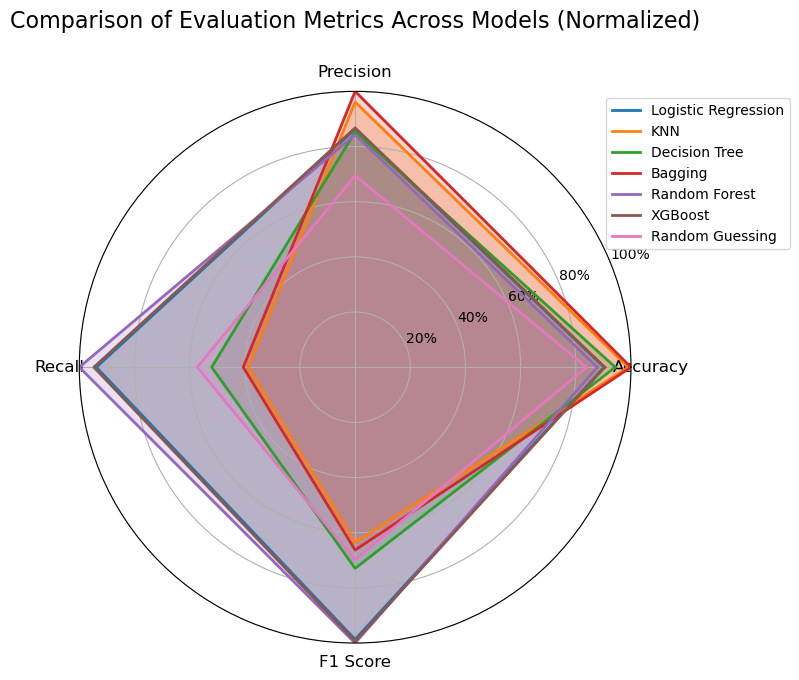

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Prepare data for radar chart
models_g = metrics_summary_df["Model"].values
metrics_g = metrics_summary_df.columns[1:]  # Metrics (Accuracy, Precision, Recall, F1 Score)

# Normalize data for better visualization (optional)
normalized_df = metrics_summary_df.copy()
for metric in metrics_g:
    normalized_df[metric] = normalized_df[metric] / normalized_df[metric].max()

# Radar chart settings
angles = [n / float(len(metrics_g)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # Close the polygon

# Initialize radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

# Add each model to the radar chart
for i, model in enumerate(models_g):
    values = normalized_df.iloc[i, 1:].values.flatten().tolist()
    values += values[:1]  # Close the polygon
    ax.plot(angles, values, label=model, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.2)

# Add labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_g, fontsize=12)

# Add grid labels
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=10)
ax.set_ylim(0, 1)

# Ensure the radar chart background is circular
ax.set_aspect('equal')

# Add title and legend
plt.title("Comparison of Evaluation Metrics Across Models (Normalized)", size=16, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1), fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

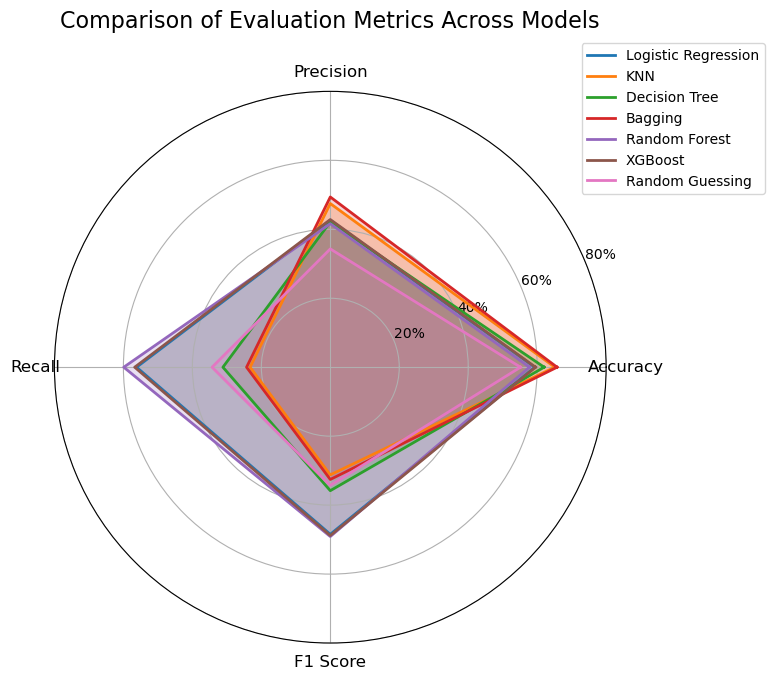

In [43]:
# Radar chart settings
angles = [n / float(len(metrics_g)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # Close the polygon

# Initialize radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

# Add each model to the radar chart
for i, model in enumerate(models_g):
    values = metrics_summary_df.iloc[i, 1:].values.flatten().tolist()
    values += values[:1]  # Close the polygon
    ax.plot(angles, values, label=model, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.2)

# Add labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_g, fontsize=12)

# Add grid labels
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=10)
ax.set_ylim(0, 0.8)

# Ensure the radar chart background is circular
ax.set_aspect('equal')

# Add title and legend
plt.title("Comparison of Evaluation Metrics Across Models", size=16, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

In [77]:
random_forest_model = models["Random Forest"]
random_forest_model.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the top features
print(importance_df)

    Feature  Importance
954    f954    0.083573
945    f945    0.040719
949    f949    0.038457
947    f947    0.038422
946    f946    0.037968
..      ...         ...
451    f451    0.000000
454    f454    0.000000
457    f457    0.000000
458    f458    0.000000
478    f478    0.000000

[956 rows x 2 columns]


In [89]:
rf_indices = [954, 945, 949, 947, 946]

# Get the column names for the given indices
rf_column_names = [X.columns[i] for i in rf_indices]
print("Column names at specified indices:", rf_column_names)

Column names at specified indices: ['Time_cos', 'MIN_TEMPERATURE MAX_TEMPERATURE', 'MAX_TEMPERATURE TOTAL_RAIN', 'MIN_TEMPERATURE TOTAL_SNOW', 'MIN_TEMPERATURE TOTAL_RAIN']


In [257]:
# Assuming logistic_model is your trained Logistic Regression model
logistic_model = models["Logistic Regression"]
logistic_model.fit(X_train, y_train)

# Get coefficients
coefficients = logistic_model.coef_[0]  # For binary classification
features = X_train.columns  # Ensure X_train is a DataFrame with column names

# Create a DataFrame for readability
log_importance_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)  # Sort by absolute value of coefficients

# Display top features
print(log_importance_df.head(10))

    Feature  Coefficient
939    f939    -4.312765
883    f883    -4.181417
40      f40    -3.897096
896    f896    -3.400468
473    f473     2.784782
700    f700    -1.769871
337    f337     1.648531
483    f483     1.566513
342    f342    -1.486956
211    f211     1.365231


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [261]:
log_pos_indices = [473, 337, 483, 211]
log_neg_indices = [939, 883, 40, 896, 700, 342]

# Get the column names for the given indices
log_pos_column_names = [X.columns[i] for i in log_pos_indices]
print("Column names at positive indices:", log_pos_column_names)

log_neg_column_names = [X.columns[i] for i in log_neg_indices]
print("Column names at negative indices:", log_neg_column_names)

Column names at positive indices: ['Station_MCCOWAN STATION', 'Station_KENNEDY SRT STATION', 'Station_MIDLAND STATION', 'Station_ELLESMERE STATION']
Column names at negative indices: ['Station_YUS/BD/SHEPPARD SUBWAY', 'Station_YONGE UNIVERSITY LINE', 'Station_BLOOR DANFORTH SUBWAY', 'Station_YONGE-UNIVERSITY AND B', 'Station_TORONTO TRANSIT COMMIS', 'Station_KENNEDY SRT STATION TO']


In [95]:
# Assuming decision_tree_model is your trained Decision Tree model
decision_tree_model = models["Decision Tree"]
decision_tree_model.fit(X_train, y_train)

# Get feature importances
dt_feature_importances = decision_tree_model.feature_importances_
dt_features = X_train.columns

# Create a DataFrame
dt_feature_importance_df = pd.DataFrame({
    "Feature": dt_features,
    "Importance": dt_feature_importances
}).sort_values(by="Importance", ascending=False)

# Display top features
print(dt_feature_importance_df.head())

    Feature  Importance
945    f945    0.120022
954    f954    0.099999
946    f946    0.072537
949    f949    0.070280
944    f944    0.057201


In [99]:
dt_indices = [945, 954, 946, 949, 944]

# Get the column names for the given indices
dt_column_names = [X.columns[i] for i in dt_indices]
print("Column names at specified indices:", dt_column_names)

Column names at specified indices: ['MIN_TEMPERATURE MAX_TEMPERATURE', 'Time_cos', 'MIN_TEMPERATURE TOTAL_RAIN', 'MAX_TEMPERATURE TOTAL_RAIN', 'MIN_TEMPERATURE^2']


# Part 2: Length of delay prediction (regression)

## Use Linear Regression to predict the length of delay (if there is delay)

In [266]:
df_delay = df[df["delay_binary"] == 1]
df_delay

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary
2,2017-01-01,03:00,Sunday,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1
6,2017-01-01,07:58,Sunday,DAVISVILLE STATION,TUNOA,6,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1
7,2017-01-01,08:17,Sunday,GREENWOOD STATION,TUNOA,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1
8,2017-01-01,08:26,Sunday,DAVISVILLE STATION,TUNOA,5,10,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1
9,2017-01-01,08:33,Sunday,SHEPPARD WEST STATION,TUNOA,5,10,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99228,2024-08-31,23:01,Saturday,VICTORIA PARK STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99229,2024-08-31,23:47,Saturday,DUPONT STATION,SUO,4,10,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99235,2024-08-31,01:25,Saturday,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1
99236,2024-08-31,01:33,Saturday,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1


In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_delay = df_delay[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]]
y_delay = df_delay["Min Delay"]

X_delay_scaled = scaler.fit_transform(X_delay)
X_train_delay, X_test_delay, y_train_delay, y_test_delay = train_test_split(X_delay_scaled, y_delay, test_size=0.2, random_state=42)

# Initialize and train linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_delay, y_train_delay)

# Make predictions on test set
y_pred_delay = regression_model.predict(X_test_delay)

# Evaluate the model
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.783719955064698
Root Mean Squared Error: 13.867632296925079


In [177]:
y_pred_delay

array([7.36232406, 6.91275942, 7.12669629, ..., 7.3268739 , 7.73521332,
       7.33567351])

## Trying a dumb model (average of min delay) as baseline

In [270]:
X_train_delay, X_test_delay, y_train_delay, y_test_delay = train_test_split(df_delay, y_delay, test_size=0.2, random_state=42)
X_train_delay

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary
34628,2018-10-01,05:51,Monday,KEELE STATION,PUTWZ,5,10,no alert,8.300000,0.0,9.500000,7.5,12.4,0,1
65958,2023-04-22,18:03,Saturday,CASTLE FRANK STATION,SUDP,5,9,no alert,15.600000,0.0,8.950000,6.4,11.4,0,1
37533,2018-11-20,11:53,Tuesday,YONGE BD STATION,MUI,3,6,no alert,0.000000,0.4,-1.166667,-4.2,1.5,0,1
73496,2023-08-23,16:49,Wednesday,DOWNSVIEW PARK STATION,MUSAN,10,13,no alert,2.700000,0.0,17.600000,14.5,20.2,0,1
29458,2018-07-09,08:14,Monday,DUPONT STATION,MUIR,6,8,no alert,0.000000,0.0,23.533333,13.0,33.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51466,2019-08-06,18:02,Tuesday,ROYAL YORK STATION,MUI,10,12,no alert,3.800000,0.0,23.500000,19.0,27.9,0,1
21053,2018-02-06,13:01,Tuesday,DON MILLS STATION,MUIS,5,10,no alert,0.000000,1.9,-7.450000,-11.3,-4.0,0,1
35598,2018-10-17,13:52,Wednesday,BAY STATION,EUDO,5,8,no alert,0.533333,0.1,5.266667,0.5,9.3,0,1
3181,2017-03-06,16:54,Monday,FINCH STATION,EUBO,3,5,no alert,4.000000,0.0,1.666667,-6.0,9.0,0,1


In [272]:
min_delay_mean = X_train_delay["Min Delay"].mean() # using the mean of Min Delay of training data only to prevent data leakage
print(min_delay_mean)

mae_with_mean = mean_absolute_error(y_test_delay, [min_delay_mean] * len(y_test_delay))
print(f"Mean Absolute Error with Mean: {mae_with_mean}")

rmse_with_mean = np.sqrt(mean_squared_error(y_test_delay, [min_delay_mean] * len(y_test_delay)))
print(f"Root Mean Squared Error with Mean: {rmse_with_mean}")

7.345965093538984
Mean Absolute Error with Mean: 4.781419662736102
Root Mean Squared Error with Mean: 13.877566228516866


Observation:
- The linear model result is very similar to the one just using the average Min Delay of the training set. This suggests that the model setup might not yet be capturing the necessary predictive signals or meaningful relationships in the data.

- Close MAE and RMSE values suggest both mean-based and linear regression may be too simplistic for predicting delay length, especially if data relationships are non-linear.

- Lack of significant improvement for linear regression over the baseline (mean-based method) implies that more relevant features may be needed to better predict delays.


Next steps: we can use this as the average min delay as the baseline model and find ways to imporve the model.
- Possible directions: feature engineering, more complex models like RF and gradient boosting etc, cross validation, regularization to mitigate noisy feature, ...

## Feature Engineering - Add interaction terms

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_delay = df_delay[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]]
y_delay = df_delay["Min Delay"]
# Weather data interactions

X_delay["MIN_TEMPERATURE_MAX_TEMPERATURE"] = X_delay["MIN_TEMPERATURE"] * X_delay["MAX_TEMPERATURE"]
X_delay["TOTAL_RAIN_TOTAL_SNOW"] = X_delay["TOTAL_RAIN"] * X_delay["TOTAL_SNOW"]

X_delay_scaled = scaler.fit_transform(X_delay)
X_train_delay, X_test_delay, y_train_delay, y_test_delay = train_test_split(X_delay_scaled, y_delay, test_size=0.2, random_state=42)

# Initialize and train linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_delay, y_train_delay)

# Make predictions on test set
y_pred_delay = regression_model.predict(X_test_delay)

# Evaluate the model
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.783623757820826
Root Mean Squared Error: 13.870289088788347


/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_9442/2233299892.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_delay["MIN_TEMPERATURE_MAX_TEMPERATURE"] = X_delay["MIN_TEMPERATURE"] * X_delay["MAX_TEMPERATURE"]
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_9442/2233299892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_delay["TOTAL_RAIN_TOTAL_SNOW"] = X_delay["TOTAL_RAIN"] * X_delay["TOTAL_SNOW"]


## Try integrating time and station

In [276]:
df_delay["Date"] = pd.to_datetime(df_delay["Date"])
df_delay["Month"] = df_delay["Date"].dt.month
df_delay["Time"] = pd.to_datetime(df_delay["Time"])
df_delay["Time"] = df_delay["Time"].dt.hour
df_delay["Date"] = pd.to_datetime(df_delay["Date"])
df_delay["Date"] = df_delay["Date"].dt.dayofyear
weekday_dict = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}
df_delay["Day"] = df_delay["Day"].map(weekday_dict)
df_delay

/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_9442/3327403467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay["Date"] = pd.to_datetime(df_delay["Date"])
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_9442/3327403467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay["Month"] = df_delay["Date"].dt.month
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_9442/3327403467.py:3: UserWarning: Could not infer format, so each element will be parsed individuall

,Date,Time,Day,Station,Code,Min Delay,Min Gap,code,TOTAL_RAIN,TOTAL_SNOW,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,alerts,delay_binary,Month
2,1,3,7,LAWRENCE STATION,EUDO,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
6,1,7,7,DAVISVILLE STATION,TUNOA,6,0,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
7,1,8,7,GREENWOOD STATION,TUNOA,4,8,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
8,1,8,7,DAVISVILLE STATION,TUNOA,5,10,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
9,1,8,7,SHEPPARD WEST STATION,TUNOA,5,10,no alert,0.0,0.0,-0.633333,-5.6,3.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99228,244,23,6,VICTORIA PARK STATION,PUSTC,3,9,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99229,244,23,6,DUPONT STATION,SUO,4,10,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99235,244,1,6,ST GEORGE YUS STATION,MUD,5,11,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8
99236,244,1,6,DUNDAS STATION,SUO,13,19,no alert,6.4,0.0,22.100000,16.1,28.1,0,1,8


In [278]:
X_delay = df_delay[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Date", "Time", "Day", "alerts", "Station"]]
X_delay = pd.get_dummies(X_delay, columns=["Station"], drop_first=True)

y_delay = df_delay["Min Delay"]

X_delay["Time_sin"] = np.sin(2 * np.pi * X_delay['Time'] / 24)
X_delay["Time_cos"] = np.cos(2 * np.pi * X_delay['Time'] / 24)
X_delay["Day_sin"] = X_delay["Day"].apply(lambda x: np.sin(2 * np.pi * x / 7))
X_delay["Day_cos"] = X_delay["Day"].apply(lambda x: np.cos(2 * np.pi * x / 7))

numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X_delay[numerical_features] = scaler.fit_transform(X_delay[numerical_features])

X_train_delay, X_test_delay, y_train_delay, y_test_delay = train_test_split(X_delay, y_delay, test_size=0.2, random_state=42)
print(X_train_delay)

# Initialize and train linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_delay, y_train_delay)

# Make predictions on test set
y_pred_delay = regression_model.predict(X_test_delay)

# Evaluate the model
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

       MIN_TEMPERATURE  MAX_TEMPERATURE  TOTAL_RAIN  TOTAL_SNOW  Date  Time  \
34628         0.369489        -0.167586    0.879999   -0.206020   274     5   
65958         0.259569        -0.255538    1.985118   -0.206020   112    18   
37533        -0.799657        -1.126259   -0.376506    0.014094   324    11   
73496         1.068978         0.518436    0.032237   -0.206020   235    16   
29458         0.919087         1.644217   -0.376506   -0.206020   190     8   
...                ...              ...         ...         ...   ...   ...   
51466         1.518649         1.195664    0.198762   -0.206020   218    18   
21053        -1.509139        -1.609993   -0.376506    0.839524    37    13   
35598        -0.330000        -0.440236   -0.295766   -0.150992   290    13   
3181         -0.979526        -0.466622    0.229039   -0.206020    65    16   
48473         0.879117         0.201810    2.075950   -0.206020   164    16   

       Day  alerts  Station_ALLEN RD (N OF EGLINTO 

## Ridge and Lasso

In [129]:
from sklearn.linear_model import Ridge

# Initialize and train linear regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_delay, y_train_delay)

# Make predictions on test set
y_pred_delay = ridge.predict(X_test_delay)

# Evaluate the model
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.646982814695077
Root Mean Squared Error: 13.696338777395582


In [127]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_delay, y_train_delay)

y_pred_delay = lasso.predict(X_test_delay)

mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.7636008034543975
Root Mean Squared Error: 13.85920499263153


## RandomForestRegessor

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

regression_model = RandomForestRegressor(random_state=42)
regression_model.fit(X_train_delay, y_train_delay)

# Make predictions on test set
y_pred_delay = regression_model.predict(X_test_delay)

# Evaluate the model
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.947950089048266
Root Mean Squared Error: 14.435119242865268


### Trying integer coded categorical feature - Station

In [138]:
X_delay_station = df_delay[["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW", "Date", "Time", "Day", "alerts", "Station"]]
y_delay_station = df_delay["Min Delay"]

X_delay_station['Station'] = pd.Categorical(X_delay_station['Station'])
station_mapping = dict(enumerate(X_delay_station['Station'].cat.categories))
# Convert Station into numerical
X_delay_station['Station'] = X_delay_station['Station'].cat.codes 

X_delay_station["Time_sin"] = np.sin(2 * np.pi * X_delay_station['Time'] / 24)
X_delay_station["Time_cos"] = np.cos(2 * np.pi * X_delay_station['Time'] / 24)
X_delay_station["Day_sin"] = X_delay_station["Day"].apply(lambda x: np.sin(2 * np.pi * x / 7))
X_delay_station["Day_cos"] = X_delay_station["Day"].apply(lambda x: np.cos(2 * np.pi * x / 7))

numerical_features = ["MIN_TEMPERATURE", "MAX_TEMPERATURE", "TOTAL_RAIN", "TOTAL_SNOW"]
scaler = StandardScaler()
X_delay_station[numerical_features] = scaler.fit_transform(X_delay_station[numerical_features])

X_train_delay_station, X_test_delay_station, y_train_delay_station, y_test_delay_station = train_test_split(X_delay_station, y_delay_station, 
                                                                                                            test_size=0.2, random_state=42)
print(X_train_delay_station)

       MIN_TEMPERATURE  MAX_TEMPERATURE  TOTAL_RAIN  TOTAL_SNOW  Date  Time  \
34628         0.369489        -0.167586    0.879999   -0.206020   274     5   
65958         0.259569        -0.255538    1.985118   -0.206020   112    18   
37533        -0.799657        -1.126259   -0.376506    0.014094   324    11   
73496         1.068978         0.518436    0.032237   -0.206020   235    16   
29458         0.919087         1.644217   -0.376506   -0.206020   190     8   
...                ...              ...         ...         ...   ...   ...   
51466         1.518649         1.195664    0.198762   -0.206020   218    18   
21053        -1.509139        -1.609993   -0.376506    0.839524    37    13   
35598        -0.330000        -0.440236   -0.295766   -0.150992   290    13   
3181         -0.979526        -0.466622    0.229039   -0.206020    65    16   
48473         0.879117         0.201810    2.075950   -0.206020   164    16   

       Day  alerts  Station  Time_sin      Time_cos

/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_1235/2653863616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_delay_station['Station'] = pd.Categorical(X_delay_station['Station'])
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_1235/2653863616.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_delay_station['Station'] = X_delay_station['Station'].cat.codes
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_1235/2653863616.py:9: SettingWithCopyWarning: 
A value is try

In [143]:
regression_rf = RandomForestRegressor(random_state=42)
regression_rf.fit(X_train_delay_station, y_train_delay_station)

# Make predictions on test set
y_pred_delay = regression_rf.predict(X_test_delay_station)

# Evaluate the model
mae = mean_absolute_error(y_test_delay_station, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay_station, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 5.42774510287774
Root Mean Squared Error: 15.2317497548569


In [98]:
'''
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
    # 'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_train_delay_station, y_train_delay_station)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best MAE Score: {-grid_search.best_score_}")
'''

'\nparam_grid = {\n    \'n_estimators\': [50, 100, 200, 500],\n    \'max_depth\': [10, 20, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'max_features\': [None, \'sqrt\', \'log2\']\n    # \'min_samples_leaf\': [1, 2, 4],\n}\n\ngrid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring=\'neg_mean_squared_error\', n_jobs=-1, verbose=3)\ngrid_search.fit(X_train_delay_station, y_train_delay_station)\n\nprint(f"Best Parameters: {grid_search.best_params_}")\nprint(f"Best MAE Score: {-grid_search.best_score_}")\n'

In [99]:
RFreg = RandomForestRegressor(max_depth=10, max_features='log2', min_samples_split=10, n_estimators=500, random_state=42)
RFreg.fit(X_train_delay_station, y_train_delay_station)

# Make predictions on test set
y_pred_delay = RFreg.predict(X_test_delay_station)
mae = mean_absolute_error(y_test_delay_station, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay_station, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.785076278835014
Root Mean Squared Error: 13.780837481842918


In [152]:
'''
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
    # 'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(X_train_delay, y_train_delay)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best MAE Score: {-grid_search.best_score_}")
'''

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=10, max_features=None, min_samples_split=2, n_estimators=50;, score=-229.046 total time=   3.3s
[CV 2/5] END max_depth=10, max_features=None, min_samples_split=2, n_estimators=50;, score=-144.072 total time=   3.4s
[CV 3/5] END max_depth=10, max_features=None, min_samples_split=2, n_estimators=50;, score=-204.505 total time=   3.3s
[CV 4/5] END max_depth=10, max_features=None, min_samples_split=2, n_estimators=50;, score=-306.916 total time=   3.4s
[CV 5/5] END max_depth=10, max_features=None, min_samples_split=2, n_estimators=50;, score=-127.390 total time=   3.5s
[CV 1/5] END max_depth=10, max_features=None, min_samples_split=2, n_estimators=100;, score=-228.452 total time=   6.6s
[CV 2/5] END max_depth=10, max_features=None, min_samples_split=2, n_estimators=100;, score=-144.160 total time=   6.7s
[CV 3/5] END max_depth=10, max_features=None, min_samples_split=2, n_estimators=100;, score=-202.690 t

KeyboardInterrupt: 

In [146]:
RFreg = RandomForestRegressor(max_depth=10, max_features='log2', min_samples_split=10, n_estimators=500, random_state=42)
RFreg.fit(X_train_delay, y_train_delay)

# Make predictions on test set
y_pred_delay = RFreg.predict(X_test_delay)
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.73039864106902
Root Mean Squared Error: 13.795182666983555


## Decision Tree/BaggingRegressor

In [84]:
# Create a Bagging Regressor with DecisionTree as the base estimator
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,  # Number of trees
    max_samples=0.8,   # Fraction of samples for bootstrap
    max_features=0.8,  # Fraction of features for each estimator
    random_state=42
)

# Train the model
bagging_regressor.fit(X_train_delay, y_train_delay)

# Make predictions
y_pred_delay = bagging_regressor.predict(X_test_delay)

# Evaluate the model
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 5.001418974649088
Root Mean Squared Error: 14.087143048378584


In [82]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(random_state = 42) # max_depth=10, min_samples_leaf=10, min_samples_split=2, 
dtreg.fit(X_train_delay, y_train_delay)
y_pred = dtreg.predict(X_test_delay)

# Train the model
dtreg.fit(X_train_delay, y_train_delay)

# Make predictions
y_pred_delay = dtreg.predict(X_test_delay)

# Evaluate the model
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 5.926146202282566
Root Mean Squared Error: 18.577099390638047


In [86]:
dtreg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state = 42) 
dtreg.fit(X_train_delay, y_train_delay)
y_pred = dtreg.predict(X_test_delay)

# Train the model
dtreg.fit(X_train_delay, y_train_delay)

# Make predictions
y_pred_delay = dtreg.predict(X_test_delay)

# Evaluate the model
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.768263755616503
Root Mean Squared Error: 13.974281894115574


## Gradient Boosting Regressor

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_delay, y_train_delay)
y_pred_delay = gb_regressor.predict(X_test_delay)
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.781368648167157
Root Mean Squared Error: 13.764450251442506


### XGBoost

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# Create DMatrix
dtrain = xgb.DMatrix(X_train_delay, label=y_train_delay)
dtest = xgb.DMatrix(X_test_delay, label=y_test_delay)

# Define the XGBoost model parameters
params = {
    'max_depth': 6,  # the maximum depth of each tree
    'eta': 0.3,      # the training step for each iteration
    'objective': 'reg:squarederror',  # regression with squared loss
    'eval_metric': 'rmse',  # root mean square error as the evaluation metric
    'early_stopping_rounds': 10  # stop if no improvement after 10 iterations
}

# Number of training iterations
num_boost_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_boost_round, evals=[(dtest, 'test')], early_stopping_rounds=params['early_stopping_rounds'])

# Predictions
y_pred_delay = bst.predict(dtest)

# Calculate the errors
mae = mean_absolute_error(y_test_delay, y_pred_delay)
mse = mean_squared_error(y_test_delay, y_pred_delay)
rmse = mse ** 0.5

# Print the evaluation metrics
print("Mean Absolute Error: {:.3f}".format(mae))
print("Root Mean Squared Error: {:.3f}".format(rmse))

[0]	test-rmse:13.77005
[1]	test-rmse:13.69869
[2]	test-rmse:13.67862
[3]	test-rmse:13.72848
[4]	test-rmse:13.73915
[5]	test-rmse:13.74445
[6]	test-rmse:13.75197
[7]	test-rmse:13.75539
[8]	test-rmse:13.75579
[9]	test-rmse:13.84814
[10]	test-rmse:13.83796
[11]	test-rmse:13.84129
Mean Absolute Error: 4.827
Root Mean Squared Error: 13.862


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [04:21:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "early_stopping_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


In [104]:
params = {
    'max_depth': 4,             # Shallower trees to prevent overfitting
    'min_child_weight': 1,      # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0.1,               # Minimum loss reduction required to make a split
    'subsample': 0.8,           # Use 80% of data to grow trees and prevent overfitting
    'colsample_bytree': 0.8,    # Use 80% of features randomly per split
    'lambda': 1,                # L2 regularization term on weights, equivalent to Ridge regression
    'alpha': 0.1,               # L1 regularization term on weights, equivalent to Lasso regression
    'eta': 0.01,                # Lower learning rate
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10
}

num_boost_round = 100  # More rounds as the learning rate is lower

# Train the model
bst = xgb.train(params, dtrain, num_boost_round, evals=[(dtest, 'test')],
                early_stopping_rounds=params['early_stopping_rounds'])

# Predictions
# Instead of ntree_limit, use best_iteration directly:
y_pred_delay = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))

# Calculate the errors
mae = mean_absolute_error(y_test_delay, y_pred_delay)
mse = mean_squared_error(y_test_delay, y_pred_delay)
rmse = mse ** 0.5

# Print the evaluation metrics
print("Mean Absolute Error: {:.3f}".format(mae))
print("Root Mean Squared Error: {:.3f}".format(rmse))

[0]	test-rmse:13.87472
[1]	test-rmse:13.87178
[2]	test-rmse:13.86742
[3]	test-rmse:13.86310
[4]	test-rmse:13.86289
[5]	test-rmse:13.86235
[6]	test-rmse:13.86210
[7]	test-rmse:13.86198
[8]	test-rmse:13.85787
[9]	test-rmse:13.85763
[10]	test-rmse:13.85373
[11]	test-rmse:13.85089
[12]	test-rmse:13.84808
[13]	test-rmse:13.84424
[14]	test-rmse:13.84035
[15]	test-rmse:13.84006
[16]	test-rmse:13.83963
[17]	test-rmse:13.83708
[18]	test-rmse:13.83470
[19]	test-rmse:13.83367
[20]	test-rmse:13.83345
[21]	test-rmse:13.83112
[22]	test-rmse:13.83077
[23]	test-rmse:13.83078
[24]	test-rmse:13.83058
[25]	test-rmse:13.83004
[26]	test-rmse:13.82983
[27]	test-rmse:13.82967
[28]	test-rmse:13.82952
[29]	test-rmse:13.82940
[30]	test-rmse:13.82921
[31]	test-rmse:13.82939
[32]	test-rmse:13.82692
[33]	test-rmse:13.82670
[34]	test-rmse:13.82651
[35]	test-rmse:13.82295
[36]	test-rmse:13.82262
[37]	test-rmse:13.82012
[38]	test-rmse:13.81995
[39]	test-rmse:13.81755
[40]	test-rmse:13.81608
[41]	test-rmse:13.81579
[4

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [04:21:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "early_stopping_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


## Support Vector Regression (SVR)

In [106]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

svr_model = SVR() #default kernel='rbf'
svr_model.fit(X_train_delay, y_train_delay)
y_pred_delay = svr_model.predict(X_test_delay)
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3.8513795309165784
Root Mean Squared Error: 14.096208658790543


In [107]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

svr_model = SVR(kernel='poly') # default degree = 3
svr_model.fit(X_train_delay, y_train_delay)
y_pred_delay = svr_model.predict(X_test_delay)
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3.847376445284901
Root Mean Squared Error: 14.102609835016628


In [108]:
svr_poly2 = SVR(kernel='poly', degree=2)
svr_poly2.fit(X_train_delay, y_train_delay)
y_pred_delay = svr_poly2.predict(X_test_delay)
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3.850594966814136
Root Mean Squared Error: 14.102577486685046


In [109]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_delay, y_train_delay)
y_pred_delay = svr_linear.predict(X_test_delay)
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3.8381444252466665
Root Mean Squared Error: 14.120135277649858


## KNN

In [111]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

knn_model = KNeighborsRegressor(n_neighbors=50)
knn_model.fit(X_train_delay, y_train_delay)
y_pred_delay = knn_model.predict(X_test_delay)
mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4.87194214876033
Root Mean Squared Error: 14.015443451270933


In [346]:
knn_results = []

# Try different numbers of neighbors
for n in range(10, 500, 40):
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(X_train_delay, y_train_delay)
    y_pred_delay = knn_model.predict(X_test_delay)
    mae = mean_absolute_error(y_test_delay, y_pred_delay)
    rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
    knn_results.append((n, mae, rmse))
    #print(f"n_neighbors={n}")
    #print(f"Mean Absolute Error: {mae}")
    #print(f"Root Mean Squared Error: {rmse}")
    #print()

results_df = pd.DataFrame(knn_results, columns=['n_neighbors', 'MAE', 'RMSE'])
print(results_df)

    n_neighbors       MAE       RMSE
0            10  5.131021  14.652858
1            50  4.873442  14.016395
2            90  4.779921  13.943452
3           130  4.753357  13.920843
4           170  4.736268  13.911290
5           210  4.739388  13.907372
6           250  4.734577  13.897475
7           290  4.731955  13.889952
8           330  4.732886  13.888232
9           370  4.734382  13.884376
10          410  4.731434  13.879696
11          450  4.730816  13.874599
12          490  4.730630  13.869748


In [358]:
knn_results = []

# Try different numbers of neighbors
for n in range(10, 2000, 100):
    knn_model = KNeighborsRegressor(n_neighbors=n, weights='distance')
    knn_model.fit(X_train_delay, y_train_delay)
    y_pred_delay = knn_model.predict(X_test_delay)
    mae = mean_absolute_error(y_test_delay, y_pred_delay)
    rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
    knn_results.append((n, mae, rmse))
    #print(f"n_neighbors={n}")
    #print(f"Mean Absolute Error: {mae}")
    #print(f"Root Mean Squared Error: {rmse}")
    #print()

results_df = pd.DataFrame(knn_results, columns=['n_neighbors', 'MAE', 'RMSE'])
print(results_df)

    n_neighbors       MAE       RMSE
0            10  5.056261  14.375278
1           110  4.698122  13.557407
2           210  4.668404  13.528962
3           310  4.658397  13.510455
4           410  4.651419  13.501885
5           510  4.648856  13.493008
6           610  4.649403  13.490807
7           710  4.648207  13.487222
8           810  4.649422  13.487815
9           910  4.650126  13.486041
10         1010  4.647557  13.484170
11         1110  4.647825  13.484891
12         1210  4.645501  13.483593
13         1310  4.644314  13.484410
14         1410  4.645626  13.485561
15         1510  4.646460  13.485663
16         1610  4.646490  13.485911
17         1710  4.646797  13.486641
18         1810  4.649097  13.486879
19         1910  4.651100  13.486661


### Incorporating Cross Validation into SVR

In [113]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

svr_model = SVR(kernel='poly')
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scorer based on Mean Squared Error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
# Perform cross-validation
mse_scores = cross_val_score(svr_model, X_train_delay, y_train_delay, cv=kf, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # negate MSE scores to positive before square root as 'greater_is_better' is False

print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


Cross-validated RMSE scores: [13.7766927  14.34316362 13.12789092 17.29637385 12.3018278 ]
Mean RMSE: 14.169189776544295


In [114]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(svr_model, X_train_delay, y_train_delay, cv=kf, scoring=mae_scorer)
mae_scores = -mae_scores

print("Cross-validated MAE scores:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

Cross-validated MAE scores: [3.90454251 3.81547489 3.83132006 4.10511109 3.767913  ]
Mean MAE: 3.884872309890377


## Model Evaluation

In [360]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=1310, weights='distance'),
    "Random Forest": RandomForestRegressor(max_depth=10, max_features='log2', min_samples_split=10, n_estimators=500, random_state=42),
    "SVR": SVR(kernel='linear') 
}

In [362]:
# Initialize a dictionary to store metrics
metrics_summary = []

# Iterate over each model
for model_name, model in models.items():
    # Fit the model
    # Train the model
    model.fit(X_train_delay, y_train_delay)
    
    # Make predictions
    y_pred_delay = model.predict(X_test_delay)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_delay, y_pred_delay)
    rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))
    
    # Append results to summary
    metrics_summary.append({
        "Model": model_name,
        "Delay time (mins)": y_pred_delay,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    })

    # Print done
    print(f"{model_name} is done")

Linear Regression is done
Ridge is done
Lasso is done
KNN is done
Random Forest is done
SVR is done


In [372]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_delay, label=y_train_delay)
dtest = xgb.DMatrix(X_test_delay, label=y_test_delay)

params = {
    'max_depth': 4,             # Shallower trees to prevent overfitting
    'min_child_weight': 1,      # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0.1,               # Minimum loss reduction required to make a split
    'subsample': 0.8,           # Use 80% of data to grow trees and prevent overfitting
    'colsample_bytree': 0.8,    # Use 80% of features randomly per split
    'lambda': 1,                # L2 regularization term on weights, equivalent to Ridge regression
    'alpha': 0.1,               # L1 regularization term on weights, equivalent to Lasso regression
    'eta': 0.01,                # Lower learning rate
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10
}

num_boost_round = 100  # More rounds as the learning rate is lower

# Train the model
bst = xgb.train(params, dtrain, num_boost_round, evals=[(dtest, 'test')],
                early_stopping_rounds=params['early_stopping_rounds'])

# Predictions
# Instead of ntree_limit, use best_iteration directly:
y_pred_delay = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))

# Calculate the errors
mae = mean_absolute_error(y_test_delay, y_pred_delay)
mse = mean_squared_error(y_test_delay, y_pred_delay)
rmse = mse ** 0.5

xgb_result = {"Model": 'XGBoost',
        "Delay time (mins)": y_pred_delay,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse}
print(xgb_result)

[0]	test-rmse:13.87711
[1]	test-rmse:13.87681
[2]	test-rmse:13.87681
[3]	test-rmse:13.87638
[4]	test-rmse:13.87619
[5]	test-rmse:13.87618
[6]	test-rmse:13.87618
[7]	test-rmse:13.87618
[8]	test-rmse:13.87581
[9]	test-rmse:13.87581
[10]	test-rmse:13.87581
[11]	test-rmse:13.87162
[12]	test-rmse:13.86957
[13]	test-rmse:13.86915
[14]	test-rmse:13.86879
[15]	test-rmse:13.86829
[16]	test-rmse:13.86706
[17]	test-rmse:13.86706
[18]	test-rmse:13.86592
[19]	test-rmse:13.86591
[20]	test-rmse:13.86567
[21]	test-rmse:13.86529
[22]	test-rmse:13.86521
[23]	test-rmse:13.86494
[24]	test-rmse:13.86463
[25]	test-rmse:13.86463
[26]	test-rmse:13.86432
[27]	test-rmse:13.86396
[28]	test-rmse:13.86369
[29]	test-rmse:13.86369
[30]	test-rmse:13.86369
[31]	test-rmse:13.86350
[32]	test-rmse:13.86350
[33]	test-rmse:13.86318
[34]	test-rmse:13.86287
[35]	test-rmse:13.86287
[36]	test-rmse:13.86287
[37]	test-rmse:13.86268
[38]	test-rmse:13.86251
[39]	test-rmse:13.86092
[40]	test-rmse:13.85681
[41]	test-rmse:13.85657
[4

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:00:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "early_stopping_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


[51]	test-rmse:13.85430
[52]	test-rmse:13.85430
[53]	test-rmse:13.85322
[54]	test-rmse:13.85304
[55]	test-rmse:13.85304
[56]	test-rmse:13.85239
[57]	test-rmse:13.85214
[58]	test-rmse:13.85190
[59]	test-rmse:13.85190
[60]	test-rmse:13.85095
[61]	test-rmse:13.85096
[62]	test-rmse:13.85088
[63]	test-rmse:13.85088
[64]	test-rmse:13.85088
[65]	test-rmse:13.85088
[66]	test-rmse:13.85072
[67]	test-rmse:13.85052
[68]	test-rmse:13.85052
[69]	test-rmse:13.85033
[70]	test-rmse:13.84633
[71]	test-rmse:13.84608
[72]	test-rmse:13.84590
[73]	test-rmse:13.84575
[74]	test-rmse:13.84316
[75]	test-rmse:13.84257
[76]	test-rmse:13.84257
[77]	test-rmse:13.84244
[78]	test-rmse:13.84245
[79]	test-rmse:13.84245
[80]	test-rmse:13.84222
[81]	test-rmse:13.84222
[82]	test-rmse:13.84175
[83]	test-rmse:13.83933
[84]	test-rmse:13.83933
[85]	test-rmse:13.83916
[86]	test-rmse:13.83916
[87]	test-rmse:13.83857
[88]	test-rmse:13.83857
[89]	test-rmse:13.83857
[90]	test-rmse:13.83766
[91]	test-rmse:13.83754
[92]	test-rmse:1

In [366]:
avg_mean_result = {"Model": "Average of Delay (Baseline)", 
                    "Delay time (mins)": min_delay_mean, 
                    "Mean Absolute Error": mae_with_mean, "Root Mean Squared Error": rmse_with_mean}

In [374]:
metrics_summary.append(xgb_result)
metrics_summary.append(avg_mean_result)
metrics_summary

[{'Model': 'Linear Regression',
  'Delay time (mins)': array([ 6.37721031, 15.85652155,  7.91384128, ...,  5.63416028,
          6.81540441,  7.22099825]),
  'Mean Absolute Error': 4.646864262343337,
  'Root Mean Squared Error': 13.697097910791799},
 {'Model': 'Ridge',
  'Delay time (mins)': array([ 6.39976882, 15.7878531 ,  7.92115056, ...,  5.71308983,
          6.86269723,  7.22515478]),
  'Mean Absolute Error': 4.653891444000595,
  'Root Mean Squared Error': 13.699561867251873},
 {'Model': 'Lasso',
  'Delay time (mins)': array([7.11042174, 7.75856663, 7.33702043, ..., 7.025565  , 7.29728758,
         7.51194133]),
  'Mean Absolute Error': 4.7636008034543975,
  'Root Mean Squared Error': 13.85920499263153},
 {'Model': 'KNN',
  'Delay time (mins)': array([7.47472165, 7.3346072 , 7.28372672, ..., 6.54584204, 7.51039851,
         7.72606832]),
  'Mean Absolute Error': 4.644314221311016,
  'Root Mean Squared Error': 13.484409766905177},
 {'Model': 'Random Forest',
  'Delay time (mins)':

In [376]:
metrics_summary_df = pd.DataFrame(metrics_summary)
metrics_summary_df

,Model,Delay time (mins),Mean Absolute Error,Root Mean Squared Error
0,Linear Regression,"[6.377210314694242, 15.856521550634593, 7.9138...",4.646864,13.697098
1,Ridge,"[6.39976881896691, 15.787853096783252, 7.92115...",4.653891,13.699562
2,Lasso,"[7.110421738496212, 7.7585666316146975, 7.3370...",4.763601,13.859205
3,KNN,"[7.4747216499223, 7.334607196752046, 7.2837267...",4.644314,13.484410
4,Random Forest,"[7.215170415451802, 8.336923377942336, 7.48571...",4.730399,13.795183
5,SVR,"[4.036640870706481, 6.207162813184926, 5.03173...",3.800235,14.076703
6,SVR,"[7.229296, 9.977685, 7.4099836, 7.4099836, 7.2...",4.742671,13.836770
7,Average of Delay (Baseline),7.345965,4.781420,13.877566
8,XGBoost,"[7.229296, 9.977685, 7.4099836, 7.4099836, 7.2...",4.742671,13.836770
9,Average of Delay (Baseline),7.345965,4.781420,13.877566


In [378]:
metrics_summary_df = metrics_summary_df.drop(index=[6, 7])
metrics_summary_df

,Model,Delay time (mins),Mean Absolute Error,Root Mean Squared Error
0,Linear Regression,"[6.377210314694242, 15.856521550634593, 7.9138...",4.646864,13.697098
1,Ridge,"[6.39976881896691, 15.787853096783252, 7.92115...",4.653891,13.699562
2,Lasso,"[7.110421738496212, 7.7585666316146975, 7.3370...",4.763601,13.859205
3,KNN,"[7.4747216499223, 7.334607196752046, 7.2837267...",4.644314,13.484410
4,Random Forest,"[7.215170415451802, 8.336923377942336, 7.48571...",4.730399,13.795183
5,SVR,"[4.036640870706481, 6.207162813184926, 5.03173...",3.800235,14.076703
8,XGBoost,"[7.229296, 9.977685, 7.4099836, 7.4099836, 7.2...",4.742671,13.836770
9,Average of Delay (Baseline),7.345965,4.781420,13.877566


In [209]:
sorted_by_mae = metrics_summary_df.sort_values(by="Mean Absolute Error", ascending=False)

# Sort by F1 Score
sorted_by_rmse = metrics_summary_df.sort_values(by="Root Mean Squared Error", ascending=False)

# Print the sorted DataFrames
print("Sorted by MAE:")
print(sorted_by_mae)
print("\nSorted by RMSE:")
print(sorted_by_rmse)

Sorted by MAE:
                         Model  \
3                          KNN   
7  Average of Delay (Baseline)   
2                        Lasso   
4                Random Forest   
1                        Ridge   
0            Linear Regression   
5                          SVR   

                                   Delay time (mins)  Mean Absolute Error  \
3  [5.98, 8.68, 5.78, 5.2, 5.98, 7.06, 7.82, 5.96...             4.873442   
7                                           7.345965             4.781420   
2  [7.110421738496212, 7.7585666316146975, 7.3370...             4.763601   
4  [7.215170415451802, 8.336923377942336, 7.48571...             4.730399   
1  [6.39976881896691, 15.787853096783252, 7.92115...             4.653891   
0  [6.377210314694242, 15.856521550634593, 7.9138...             4.646864   
5  [4.036640870706481, 6.207162813184926, 5.03173...             3.800235   

   Root Mean Squared Error  
3                14.016395  
7                13.877566  
2       

In [394]:
LR_model = models["Linear Regression"]
LR_model.fit(X_train_delay, y_train_delay)

# Get coefficients
coefficients = LR_model.coef_  
features = X_train_delay.columns  

# Create a DataFrame for readability
LR_importance_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)  

# Display top features
print(LR_importance_df.head(10))

                            Feature  Coefficient
29   Station_BROADVIEW AND ST GEORG   699.771423
112    Station_ISLINGTON TO KIPLING   623.991709
217    Station_SCARB CENTRE STATION   250.865782
154     Station_KIPLING TO OLD MILL   179.266666
160  Station_LAWRENCE EAST TO ELLES   131.279764
173                  Station_LINE 4    76.077783
184  Station_MIDLAND STATION TO ELL    74.474835
117  Station_JANE TO OSSINGTON STAT    62.714308
77   Station_E/O WARDEN TO W/O VICT    60.210117
12   Station_BATHURST TO CASTLE FRA    42.137176


In [396]:
ridge_model = models["Ridge"]
ridge_model.fit(X_train_delay, y_train_delay)

# Get coefficients
coefficients = ridge_model.coef_ 
features = X_train_delay.columns 

# Create a DataFrame for readability
ridge_importance_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)  

# Display top features
print(ridge_importance_df.head(10))

                            Feature  Coefficient
29   Station_BROADVIEW AND ST GEORG   350.964374
112    Station_ISLINGTON TO KIPLING   313.123028
217    Station_SCARB CENTRE STATION   126.536032
154     Station_KIPLING TO OLD MILL    90.488287
160  Station_LAWRENCE EAST TO ELLES    66.772815
173                  Station_LINE 4    39.151117
184  Station_MIDLAND STATION TO ELL    38.352351
117  Station_JANE TO OSSINGTON STAT    32.480055
77   Station_E/O WARDEN TO W/O VICT    31.194067
12   Station_BATHURST TO CASTLE FRA    22.171585


In [398]:
lasso_model = models["Lasso"]
lasso_model.fit(X_train_delay, y_train_delay)

# Get coefficients
coefficients = lasso_model.coef_
features = X_train_delay.columns  

# Create a DataFrame for readability
lasso_importance_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False) 

# Display top features
print(lasso_importance_df.head(10))

                            Feature  Coefficient
359                         Day_cos     0.232599
357                        Time_cos     0.229395
2                        TOTAL_RAIN     0.107613
6                               Day     0.097237
5                              Time     0.016766
4                              Date    -0.002006
237   Station_SOUTH OF LAWRENCE SRT     0.000000
246  Station_ST CLAIR - FINCH STATI     0.000000
245       Station_ST ANDREW STATION    -0.000000
244                Station_SRT LINE     0.000000


In [217]:
random_forest_model = models["Random Forest"]
random_forest_model.fit(X_train_delay, y_train_delay)

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    "Feature": X_train_delay.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the top features
print(importance_df.head(10))

                            Feature  Importance
29   Station_BROADVIEW AND ST GEORG    0.111585
112    Station_ISLINGTON TO KIPLING    0.080039
1                   MAX_TEMPERATURE    0.070970
4                              Date    0.064821
356                        Time_sin    0.064016
0                   MIN_TEMPERATURE    0.062556
2                        TOTAL_RAIN    0.055024
357                        Time_cos    0.053848
5                              Time    0.050026
217    Station_SCARB CENTRE STATION    0.049037


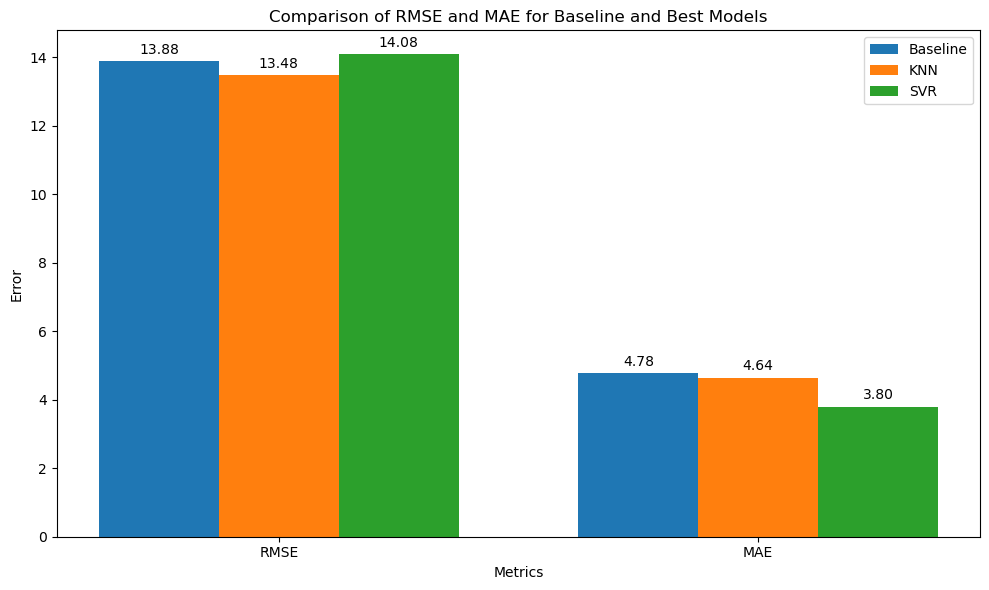

In [380]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
metrics = ['RMSE', 'MAE']
svr_values = [14.076703, 3.800235]
knn_values = [13.484410, 4.644314]
baseline_values = [13.877566, 4.781420]

# Bar chart setup
x = np.arange(len(metrics))
width = 0.25

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, baseline_values, width, label='Baseline')
bars2 = ax.bar(x, knn_values, width, label='KNN')
bars3 = ax.bar(x + width, svr_values, width, label='SVR')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Error')
ax.set_title('Comparison of RMSE and MAE for Baseline and Best Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value annotations on the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show the chart
plt.tight_layout()
plt.show()